## Жёлтое такси в Нью-Йорке. Часть 2.
Финальный проект специализации __Машинное обучение и анализ данных от Яндекса и МФТИ.__

__Задача проекта__ — научиться предсказывать количество поездок в ближайшие часы в каждом районе Нью-Йорка. Для обучения использовались данные с мая 2014 г. по май 2016 г. Прогнозы составлены на июнь 2016 г.

### Работа с геоданными
Используем библиотеку folium для отрисовки географии

In [2]:
# !pip install watermark
%load_ext watermark

In [4]:
%watermark -v -m -p numpy,scipy,pandas,matplotlib,statsmodels,folium,colour -g

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.28.0

numpy      : 1.20.1
scipy      : 1.6.2
pandas     : 1.2.2
matplotlib : 3.4.3
statsmodels: 0.12.2
folium     : 0.12.1.post1
colour     : 0.1.5

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-88-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Git hash: 9c4e9dbcdbca4aacf86d5628b56ed240cdfa5874



In [5]:
# For compatibility with future Python versions
from __future__ import division

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Main system library importing
import os

# Main modelling libraries importing
import numpy as np
import pandas as pd
import datetime

# Main statistical library importing
from scipy import stats as sts

# Main visual library importing
# Standard visualize
import matplotlib.image as pltimg
from matplotlib import pylab as plt

# Geo visualisation
import folium
from colour import Color

### Загрузка данных, нулевые ячейки.

In [6]:
dir_with_count_data = os.path.abspath('/media/tater/MainStorage/TaxiRoutes/count_data')
files_with_count_data = os.listdir(dir_with_count_data)
files_with_count_data.sort()
files_with_count_data

['count_cleaned_yellow_tripdata_2014-05.csv',
 'count_cleaned_yellow_tripdata_2014-06.csv',
 'count_cleaned_yellow_tripdata_2014-07.csv',
 'count_cleaned_yellow_tripdata_2014-08.csv',
 'count_cleaned_yellow_tripdata_2014-09.csv',
 'count_cleaned_yellow_tripdata_2014-10.csv',
 'count_cleaned_yellow_tripdata_2014-11.csv',
 'count_cleaned_yellow_tripdata_2014-12.csv',
 'count_cleaned_yellow_tripdata_2015-01.csv',
 'count_cleaned_yellow_tripdata_2015-02.csv',
 'count_cleaned_yellow_tripdata_2015-03.csv',
 'count_cleaned_yellow_tripdata_2015-04.csv',
 'count_cleaned_yellow_tripdata_2015-05.csv',
 'count_cleaned_yellow_tripdata_2015-06.csv',
 'count_cleaned_yellow_tripdata_2015-07.csv',
 'count_cleaned_yellow_tripdata_2015-08.csv',
 'count_cleaned_yellow_tripdata_2015-09.csv',
 'count_cleaned_yellow_tripdata_2015-10.csv',
 'count_cleaned_yellow_tripdata_2015-11.csv',
 'count_cleaned_yellow_tripdata_2015-12.csv',
 'count_cleaned_yellow_tripdata_2016-01.csv',
 'count_cleaned_yellow_tripdata_20

In [7]:
file = os.path.join(dir_with_count_data, 'count_cleaned_yellow_tripdata_2016-05.csv')
file

'/media/tater/MainStorage/TaxiRoutes/count_data/count_cleaned_yellow_tripdata_2016-05.csv'

In [8]:
data = pd.read_csv(file, sep=',', header=0, index_col=0)
data.shape

(2500, 749)

In [9]:
data.head()

region      west       east      south      north  2016-05-01 00:00:00  \
0       1 -74.25559 -74.244478  40.496120  40.504508                  0.0   
1       2 -74.25559 -74.244478  40.504508  40.512896                  0.0   
2       3 -74.25559 -74.244478  40.512896  40.521285                  0.0   
3       4 -74.25559 -74.244478  40.521285  40.529673                  0.0   
4       5 -74.25559 -74.244478  40.529673  40.538061                  0.0   

   2016-05-01 01:00:00  2016-05-01 02:00:00  2016-05-01 03:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2016-05-01 04:00:00  ...  2016-05-31 14:00:00  2016-05-31 15:00:00  \
0                  0.0  ...                  0.0                  0.0   
1                  0.0  ...                  0.0                  0.0   
2                  0.0  ...                  0.0                  0.0   
3                  0.0  ...                  0.0                  0.0   
4                  0.0  ...                  0.0                  0.0   

   2016-05-31 16:00:00  2016-05-31 17:00:00  2016-05-31 18:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2016-05-31 19:00:00  2016-05-31 20:00:00  2016-05-31 21:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2016-05-31 22:00:00  2016-05-31 23:00:00  
0                  0.0                  0.0  
1                  0.0                  0.0  
2                  0.0                  0.0  
3                  0.0                  0.0  
4                  0.0                  0.0  

[5 rows x 749 columns]

In [10]:
num_of_zones = data.shape[0]
num_of_zeros_zones = 0
drop_indexes = [] # Список ненужных строк
trips = np.array(data.iloc[:, 5:])
for i in range(trips.shape[0]):
    if trips[i].sum() == 0:
        num_of_zeros_zones += 1
        drop_indexes.append(i)
data.drop(index=drop_indexes, inplace=True)
print('Всего {} зон. Количество зон без поездок за май 2016г - {}.'.format(num_of_zones, num_of_zeros_zones))

Всего 2500 зон. Количество зон без поездок за май 2016г - 1283.


### Статическая карта. Empire State Building.
Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

In [16]:
# CutyCapt – это маленькая кроссплатформенная утилита командной строки для захвата рендеринга WebKit веб-страницы 
# в различных векторных и растовых форматах, включая SVG, PDF, PS, PNG, JPEG, TIFF, GIF и BMP.

# Установка для Линукс (снимите комментарий)
# !sudo apt-get install cutycapt

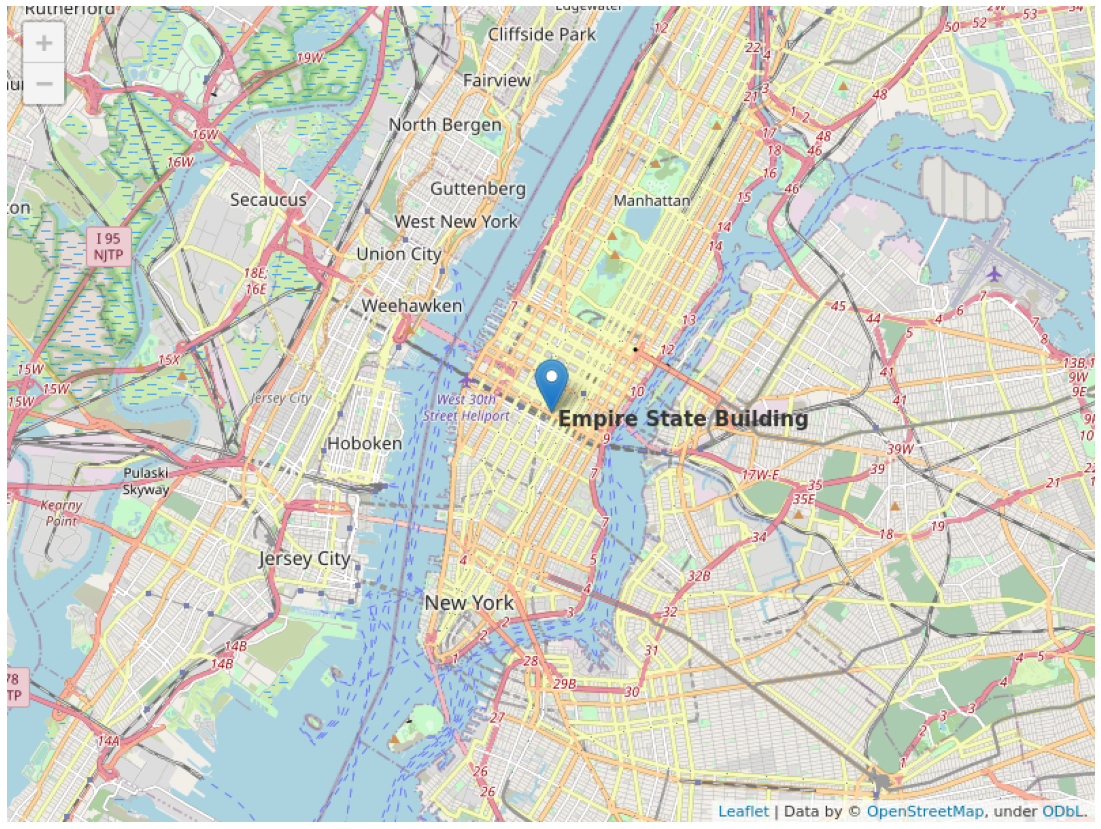

In [54]:
# Рисуем Empire State Building
empire_coordinates = [40.748817, -73.985428]

lat = empire_coordinates[0]
lon = empire_coordinates[1]
title = 'Empire State Building'
tooltip = 'OpenStreetMap'

# Создаем объект карты с базовой точкой в Эмпайер Стейт
m = folium.Map(location=empire_coordinates, 
               zoom_start=12, 
               min_zoom=12, 
               max_zoom=12, 
               png_enabled=False)
# Маркер точки Эмпайер Стейт
folium.Marker(empire_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
# Подпись к маркеру Эмпайер Стейт
folium.map.Marker(
                  [lat+0.003, lon], # Смещение относительно маркера
                  icon=folium.features.DivIcon(
                      icon_size=(200,36),
                      icon_anchor=(-5,-5),
                      html='<div style="font-size: 11pt"><b>%s</b></div>' % title,
                  )
                 ).add_to(m)
m.save('map_1.html')

# Сохраняем в png.
outdir = os.path.dirname(os.path.abspath('file'))
url = f"file://{os.getcwd()}/map_1.html"
outfn = os.path.join(outdir,"map_1.png")
# Перехватываем файл html утилитой
com = f'cutycapt --url={url} --out={outfn} --delay=1000 --plugins=on --javascript=on --js-can-access-clipboard=on --java=on'
# Выполняем в оболочке ОС
os.system(com)

# Печатаем.
plt.figure(figsize=(20, 15))
map_image = pltimg.imread('map_1.png')
plt.imshow(map_image)
plt.axis('off') #Оси не имеют смысла
plt.show()

### Статическая карта. Суммарное количество поезок.
Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [55]:
# Суммарное количество поездок, координаты зон.
trips_data = np.array([i.sum() for i in np.array(data.iloc[:, 5:])])
coord_data = np.array(data.iloc[:, :5])

In [59]:
# Градиент.
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_data.max())))

In [69]:
def create_colorbar(range_ticks, trips_values, grad):
    return np.array([[tuple([int(round(j * 255, 0)) for j in grad[int(i) - 1].rgb]) for i in trips_values] for _ in range(100)])

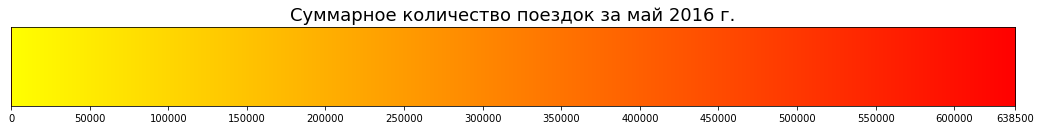

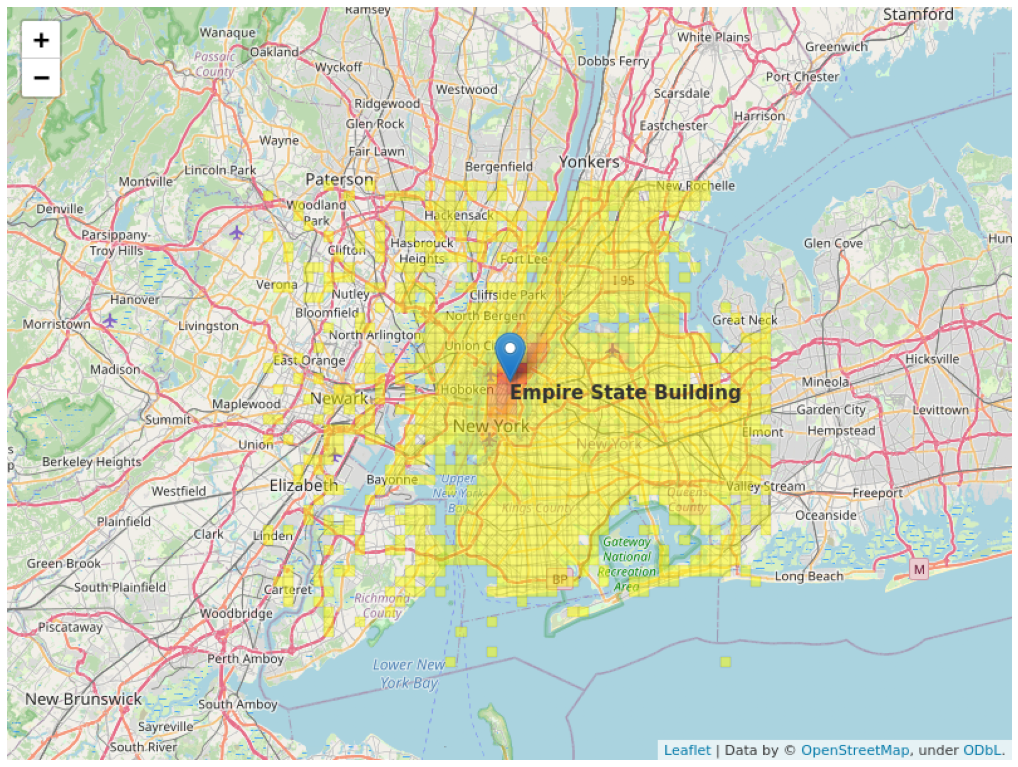

In [73]:
# Colorbar.
plt.figure(figsize=(18, 1.5))
trips_values = list(range(0, int(trips_data.max()) + 1, 500))
colorbar = create_colorbar(100, trips_values, grad)

plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Суммарное количество поездок за май 2016 г.', y=1.01, fontsize=18)
plt.show()

# Карта.
m = folium.Map(location=empire_coordinates, 
               zoom_start=10, 
               png_enabled=False)

# Рисуем суммарное количество поездок
features = []
for i in range(data.shape[0]):
    
    west = coord_data[i][1]
    east = coord_data[i][2]
    south = coord_data[i][3]
    north = coord_data[i][4]
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    fillcolor = grad[int(trips_data[i] - 1)].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip=str(int(coord_data[i][0])), 
                                   fill=True, fill_color=fillcolor, fill_opacity=0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)
    
# Маркер точки Эмпайер Стейт
folium.Marker(empire_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
# Подпись к маркеру Эмпайер Стейт
folium.map.Marker(
                  [lat+0.003, lon], # Смещение относительно маркера
                  icon=folium.features.DivIcon(
                      icon_size=(200,36),
                      icon_anchor=(0,0),
                      html='<div style="font-size: 11pt"><b>%s</b></div>' % title,
                  )
                 ).add_to(m)
m.save('map_2.html')


# Сохраняем в png.
outdir = os.path.dirname(os.path.abspath('file'))
url = "file://{}/map_2.html".format(os.getcwd())
outfn = os.path.join(outdir,"map_2.png")
com = f'cutycapt --url={url} --out={outfn} --delay=1000 --plugins=on --javascript=on --js-can-access-clipboard=on --java=on'
os.system(com)

# Печатаем.
plt.figure(figsize=(18, 15))
map_image = pltimg.imread('map_2.png')
plt.imshow(map_image)
plt.axis('off')
plt.show()

Налицо наличие ошибок геолокации: начало некоторых поездок отображено в воде, что логически неверно

### Фильтрация ячеек.

In [74]:
data = data.reset_index(drop=True)

In [75]:
data.head()

region      west       east      south      north  2016-05-01 00:00:00  \
0      15 -74.25559 -74.244478  40.613555  40.621943                  0.0   
1      16 -74.25559 -74.244478  40.621943  40.630331                  0.0   
2      25 -74.25559 -74.244478  40.697437  40.705825                  0.0   
3      27 -74.25559 -74.244478  40.714213  40.722601                  0.0   
4      32 -74.25559 -74.244478  40.756154  40.764542                  0.0   

   2016-05-01 01:00:00  2016-05-01 02:00:00  2016-05-01 03:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2016-05-01 04:00:00  ...  2016-05-31 14:00:00  2016-05-31 15:00:00  \
0                  0.0  ...                  0.0                  0.0   
1                  0.0  ...                  0.0                  0.0   
2                  0.0  ...                  0.0                  0.0   
3                  0.0  ...                  0.0                  0.0   
4                  0.0  ...                  0.0                  0.0   

   2016-05-31 16:00:00  2016-05-31 17:00:00  2016-05-31 18:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2016-05-31 19:00:00  2016-05-31 20:00:00  2016-05-31 21:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2016-05-31 22:00:00  2016-05-31 23:00:00  
0                  0.0                  0.0  
1                  0.0                  0.0  
2                  0.0                  0.0  
3                  0.0                  0.0  
4                  0.0                  0.0  

[5 rows x 749 columns]

In [80]:
distr_data = np.array(data.iloc[:, 5:])
# Индексы строчек, где было совершено более 100000 поездок
cool_indexes = []
for i in range(distr_data.shape[0]):
    if distr_data[i].sum() > 100000:
        cool_indexes.append(i)

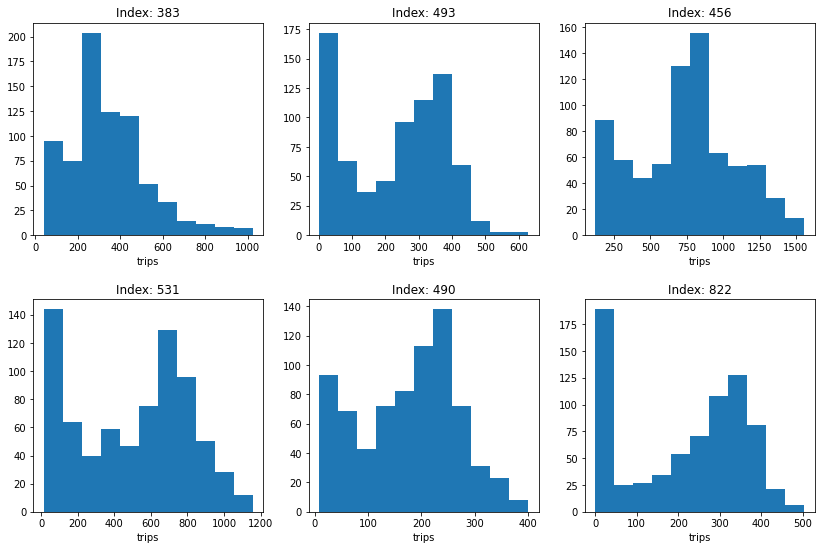

In [83]:
bins = int(round(1 + 3.322 * np.log10(distr_data.shape[0])))

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 9))
plt.subplots_adjust(hspace=0.3)
for i in range(6):
    ax = axis[i // 3, i % 3]
    index = np.random.choice(cool_indexes)
    ax.hist(distr_data[index], bins)
    ax.set_title('Index: {}'.format(str(index)))
    ax.set_xlabel('trips')
plt.show()

In [84]:
# Отсеим строчки, в которых среднее количество поездок менее 5 в час
drop_ids = []
for i in range(distr_data.shape[0]):
    arr = distr_data[i]
    if arr.mean() < 5:
        drop_ids.append(i)
data.drop(index=drop_ids, inplace=True, errors='ignore')
print('Количество ячеек со средним числом поездок меньшим пяти - {}'.format(str(len(drop_ids))))
print('Количество оставшихся ячеек - {}'.format(data.shape[0]))

Количество ячеек со средним числом поездок меньшим пяти - 1115
Количество оставшихся ячеек - 102


### Динамическая карта. Статуя свободы. Файл map_3.html
Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.(в ноутбуке выведена статическая карта, для просмотра динамической - используйте файл map_3.html)

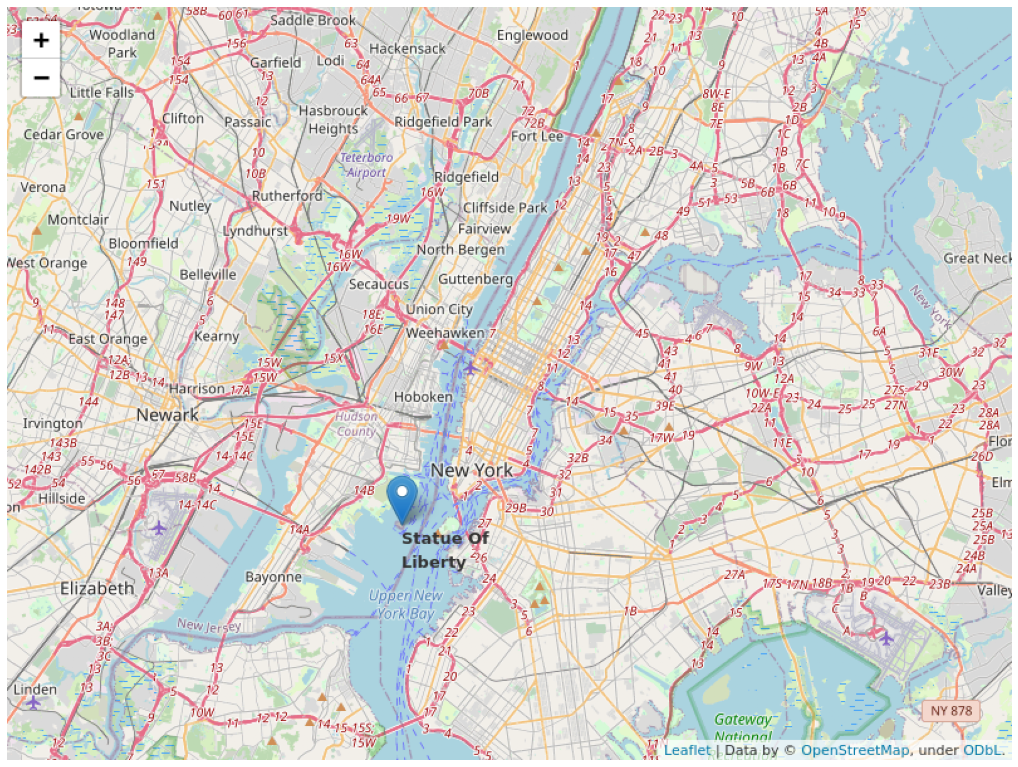

In [92]:
# Рисуем статую свободы
liberty_coordinates = [40.689247, -74.044502]
lat = liberty_coordinates[0]
lon = liberty_coordinates[1]

title = 'Statue Of Liberty'
tooltip = 'OpenStreetMap'

# Карта
m = folium.Map(location=empire_coordinates, 
               zoom_start=11,
               min_zoom=5,
               max_zoom=25,
               png_enabled=False)

# Маркер Статуи Свободы
folium.Marker(liberty_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
# Подпись к маркеру Статуи Свободы
folium.map.Marker(
                     [lat-0.01, lon],
                     icon=folium.features.DivIcon(
                         icon_size=(120,36),
                         icon_anchor=(0,20),
                         html='<div style="font-size: 10pt"><b>%s</b></div>' % title,
                     )
                ).add_to(m)
m.save('map_3.html')


# Сохраняем в png.
outdir = os.path.dirname(os.path.abspath('file'))
url = "file://{}/map_3.html".format(os.getcwd())
outfn = os.path.join(outdir,"map_3.png")
com = f'cutycapt --url={url} --out={outfn} --delay=1000 --plugins=on --javascript=on --js-can-access-clipboard=on --java=on'
os.system(com)

# Печатаем.
plt.figure(figsize=(18, 15))
map_image = pltimg.imread('map_3.png')
plt.imshow(map_image)
plt.axis('off')
plt.show()

### Динамическая карта. Среднее количество поездок. Файл map_4.html.
Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.(в ноутбуке выведена статическая карта, для просмотра динамической - используйте файл map_4.html)

In [93]:
data = data.reset_index(drop=True)

In [94]:
data.head()

region       west       east      south      north  2016-05-01 00:00:00  \
0    1075 -74.022246 -74.011135  40.697437  40.705825                 71.0   
1    1076 -74.022246 -74.011135  40.705825  40.714213                 64.0   
2    1077 -74.022246 -74.011135  40.714213  40.722601                 52.0   
3    1125 -74.011135 -74.000023  40.697437  40.705825                 81.0   
4    1126 -74.011135 -74.000023  40.705825  40.714213                259.0   

   2016-05-01 01:00:00  2016-05-01 02:00:00  2016-05-01 03:00:00  \
0                 37.0                 10.0                 14.0   
1                 39.0                 46.0                 25.0   
2                 13.0                  8.0                  6.0   
3                 38.0                 34.0                 23.0   
4                121.0                 86.0                 59.0   

   2016-05-01 04:00:00  ...  2016-05-31 14:00:00  2016-05-31 15:00:00  \
0                  6.0  ...                124.0                105.0   
1                 20.0  ...                214.0                208.0   
2                  4.0  ...                104.0                 69.0   
3                 22.0  ...                 96.0                 70.0   
4                 64.0  ...                205.0                213.0   

   2016-05-31 16:00:00  2016-05-31 17:00:00  2016-05-31 18:00:00  \
0                 80.0                 84.0                106.0   
1                156.0                202.0                213.0   
2                 67.0                109.0                173.0   
3                 68.0                109.0                126.0   
4                168.0                250.0                281.0   

   2016-05-31 19:00:00  2016-05-31 20:00:00  2016-05-31 21:00:00  \
0                106.0                 99.0                 84.0   
1                167.0                166.0                173.0   
2                171.0                165.0                107.0   
3                 88.0                 65.0                 78.0   
4                293.0                301.0                256.0   

   2016-05-31 22:00:00  2016-05-31 23:00:00  
0                 83.0                 34.0  
1                 98.0                 77.0  
2                127.0                 58.0  
3                 94.0                 53.0  
4                174.0                118.0  

[5 rows x 749 columns]

In [95]:
# Среднее количество поездок, координаты зон.
trips_data = np.array([i.mean() for i in np.array(data.iloc[:, 5:])])
coord_data = np.array(data.iloc[:, :5])

In [99]:
# Градиент.
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_data.max())))

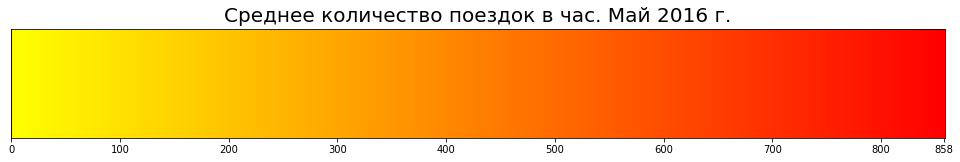

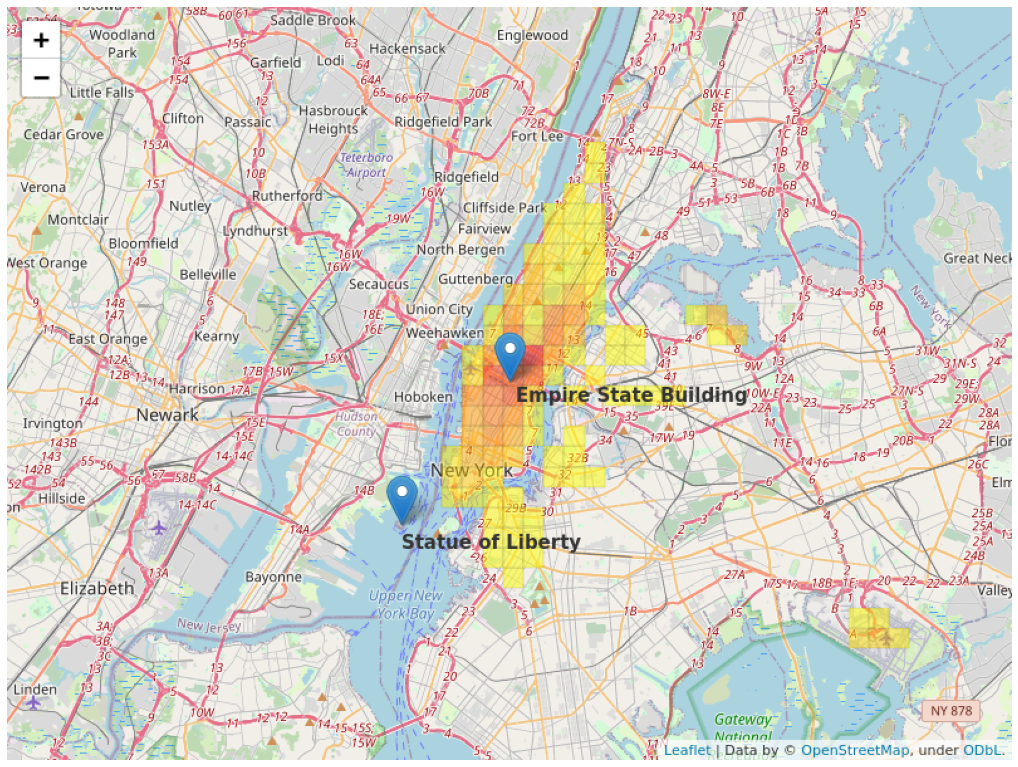

In [106]:
# Colorbar.
plt.figure(figsize=(18, 2))
trips_values = list(range(0, int(trips_data.max())+1))
colorbar = create_colorbar(100, trips_values, grad)

plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Среднее количество поездок в час. Май 2016 г.', y=1.01, fontsize=20)
plt.show()

# Карта.
m = folium.Map(location=empire_coordinates, 
               zoom_start=11,
               min_zoom=1,
               max_zoom=25,
               png_enabled=False)

# Рисуем суммарное количество поездок
features = []
for i in range(data.shape[0]):
    
    west = coord_data[i][1]
    east = coord_data[i][2]
    south = coord_data[i][3]
    north = coord_data[i][4]
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    fillcolor = grad[int(trips_data[i]-1)].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip='region {}; trips {}'.format(int(coord_data[i][0]), int(trips_data[i]-1)), 
                                   fill=True, fill_color=fillcolor, fill_opacity = 0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)
    
    
#Эмпайер Стейт
title_1 = "Empire State Building"
empire_coordinates = [40.748817, -73.985428]
lat_empire = empire_coordinates[0]
lon_empire = empire_coordinates[1]

# Маркер точки Эмпайер Стейт
folium.Marker(empire_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
# Подпись к маркеру Эмпайер Стейт
folium.map.Marker(
                  [lat_empire+0.003, lon_empire], # Смещение относительно маркера
                  icon=folium.features.DivIcon(
                      icon_size=(200,36),
                      icon_anchor=(-5,-5),
                      html='<div style="font-size: 11pt"><b>%s</b></div>' % title_1,
                  )
                 ).add_to(m)



#Статуя Свободы
title_2 = "Statue of Liberty"
liberty_coordinates = [40.689247, -74.044502]
lat_liberty = liberty_coordinates[0]
lon_liberty = liberty_coordinates[1]

# Маркер точки Статуи Свободы
folium.Marker(liberty_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
# Подпись к маркеру Статуи Свободы
folium.map.Marker(
                  [lat_liberty-0.001, lon_liberty], # Смещение относительно маркера
                  icon=folium.features.DivIcon(
                      icon_size=(200,36),
                      icon_anchor=(0,0),
                      html='<div style="font-size: 11pt"><b>%s</b></div>' % title_2,
                  )
                 ).add_to(m)


m.save('map_4.html')


# Сохраняем в png.
outdir = os.path.dirname(os.path.abspath('file'))
url = "file://{}/map_4.html".format(os.getcwd())
outfn = os.path.join(outdir,"map_4.png")
com = f'cutycapt --url={url} --out={outfn} --delay=1000 --plugins=on --javascript=on --js-can-access-clipboard=on --java=on'
os.system(com)

# Печатаем.
plt.figure(figsize=(18, 15))
map_image = pltimg.imread('map_4.png')
plt.imshow(map_image)
plt.axis('off')
plt.show()

После проведенных преобразований - все выглядит более правдоподобно. Отсутствуют "псевдопоездки"